# Decoding Life Expectancy: Insights from Global Data by Abdullah Mustafa
### _Analyzing the Influence of Geography, Education, and Lifestyle on Life Expectancy_
<!-- <span style="color:#83898b">*Understanding the role of passenger class on survival*</span> -->

This analysis explores the factors influencing life expectancy, a key metric for understanding population health and well-being. A major focus is the impact of being born in a developed or developing country, as this distinction often determines access to resources, healthcare, and economic opportunities. Education, categorized into elementary, high school, and higher levels, is examined as a powerful determinant of health, with higher educational attainment linked to improved socio-economic standing and healthier lifestyles.
Lifestyle choices, particularly alcohol consumption, are analyzed for their correlation with life expectancy, as excessive consumption often leads to chronic illnesses and reduced longevity. Additionally, the prevalence of diseases such as measles, polio, hepatitis B, and HIV/AIDS is highlighted. These diseases have a disproportionate impact on developing countries, where limited access to vaccinations and healthcare intensifies their effect. This analysis uncovers patterns and relationships between these factors, providing insights into global health disparities and strategies to improve life expectancy worldwide. Dataset for this analysis was sourced from [GitHub repository](https://raw.githubusercontent.com/AbdulMus/lifeEx/refs/heads/main/Life%20Expectancy%20Data%20(3).csv). One interesting question that emerged from the data is: "How do education levels and alcohol consumption interact with a country's development status (developed vs. developing) to influence life expectancy?" This question is intriguing because it combines socio-economic factors (education), behavioral choices (alcohol consumption), and structural inequalities (country status) to uncover their collective impact on global health disparities.


![life_expectancy](https://upload.wikimedia.org/wikipedia/commons/3/3a/Life_expectancy_UN_map_gradient_2023.png)
##### *Image source: https://upload.wikimedia.org/wikipedia/commons/3/3a/Life_expectancy_UN_map_gradient_2023.png*

## Methods
### Data Collection

A subset of global life expectancy data, originally sourced from Kaggle, has been made available through a [GitHub repository](https://raw.githubusercontent.com/AbdulMus/lifeEx/refs/heads/main/Life%20Expectancy%20Data%20(3).csv) for this analysis.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from IPython.display import display

ValueError: Key backend: 'module://matplotlib_inline.backend_inline' is not a valid value for backend; supported values are ['gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wxagg', 'wxcairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']

In [3]:
# Load the dataset
life_expectancy = pd.read_csv('https://raw.githubusercontent.com/AbdulMus/lifeEx/refs/heads/main/Life%20Expectancy%20Data%20(3).csv')

# Display dataframe
life_expectancy



NameError: name 'pd' is not defined

### Data Cleaning

The life expectancy dataset underwent several preprocessing steps. Column names were standardized for clarity.

In [29]:
# Clean column names: Remove spaces and standardize formatting
life_expectancy.columns = life_expectancy.columns.str.strip().str.replace(' ', '_').str.lower()


floating-point precision was adjusted for more concise outputs.

In [30]:
# Set display precision
pd.set_option('display.precision', 2)

Additionally, unnecessary columns that did not contribute to the analysis were removed to streamline the dataset.

In [1]:
# List of columns to remove (ensure they match exactly)
columns_to_remove = ['Year', 'Adult Mortality', 'Total expenditure', 'Population',
                     'percentage expenditure', 'Diphtheria', 'thinness 5-9 years', 
                     'Income composition of resources']

# Remove the specified columns from the dataset
life_expectancy = life_expectancy.drop(columns=columns_to_remove, errors='ignore')

NameError: name 'life_expectancy' is not defined

Rows with missing data were eliminated. 

In [32]:
# Drop rows with missing values
life_expectancy = life_expectancy.dropna(axis=0)

# Check for missing values again
missing_data = life_expectancy.isnull().sum(axis=0)

print("Missing values per column after cleaning:")
print(missing_data)

# Print total sample size after cleaning
print(f"Total sample size after cleaning: {life_expectancy.shape[0]} rows")

Missing values per column after cleaning:
country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness__1-19_years               0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64
Total sample size after cleaning: 1649 rows



The total sample size after cleaning the dataset is 1649 observations, representing the final dataset used for analysis.

## Analyses
The relationships between life expectancy, education level, alcohol consumption, and country status (developed or developing) will be explored through statistical summaries and visualizations.

### Distributions
The analysis begins by examining the distributions within the life expectancy dataset. The figure below illustrates the distribution of life expectancy across countries.

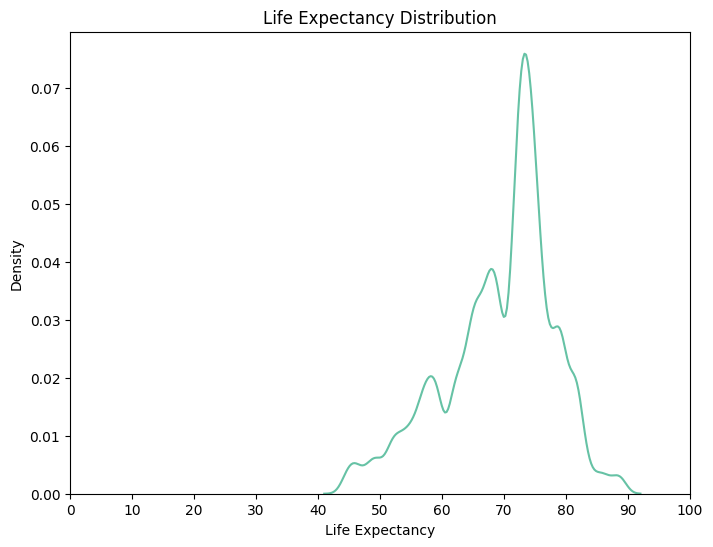

The average life expectancy across all data is 69.30 years.


In [33]:
# Plot the Kernel Density Estimate (KDE) for life expectancy
plt.figure(figsize=(8, 6))
sns.kdeplot(data=life_expectancy, x="life_expectancy", bw_adjust=0.5)

# Set x-axis ticks at intervals of 10
plt.xticks(range(0, 110, 10))

# Add title and labels
plt.title("Life Expectancy Distribution")
plt.xlabel("Life Expectancy")
plt.ylabel("Density")
plt.show()

# Calculate the average life expectancy
average_life_expectancy = life_expectancy["life_expectancy"].mean()

# Print the statement
print(f"The average life expectancy across all data is {average_life_expectancy:.2f} years.")


Comparison of Life Expectancy: Developed vs Developing Countries

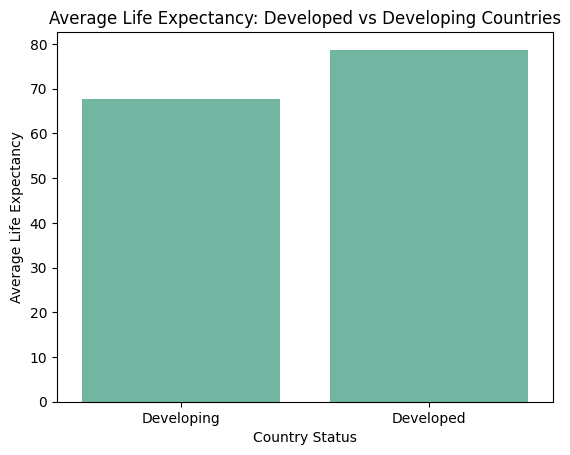

Average Life Expectancy by Status:
 status
Developed     78.69
Developing    67.69
Name: life_expectancy, dtype: float64


In [34]:
# Set the color palette
sns.set_palette("Set2")

# Create a grouped bar chart for Developed vs Developing life expectancy
h = sns.barplot(
    x=life_expectancy["status"], 
    y=life_expectancy["life_expectancy"],
    estimator='mean',  # Calculates the average life expectancy for each group
    errorbar=None  # Removes error bars for a cleaner visualization
)

# Add labels and title
h.set_title("Average Life Expectancy: Developed vs Developing Countries")
h.set_xlabel("Country Status")
h.set_ylabel("Average Life Expectancy")

plt.show()

# Calculate and print average life expectancy by status
average_life_expectancy = life_expectancy.groupby("status")["life_expectancy"].mean()
print("Average Life Expectancy by Status:\n", average_life_expectancy)






Deaths from Measles, Hepatitis B, Polio, and HIV/AIDS: Developed vs Developing Countries

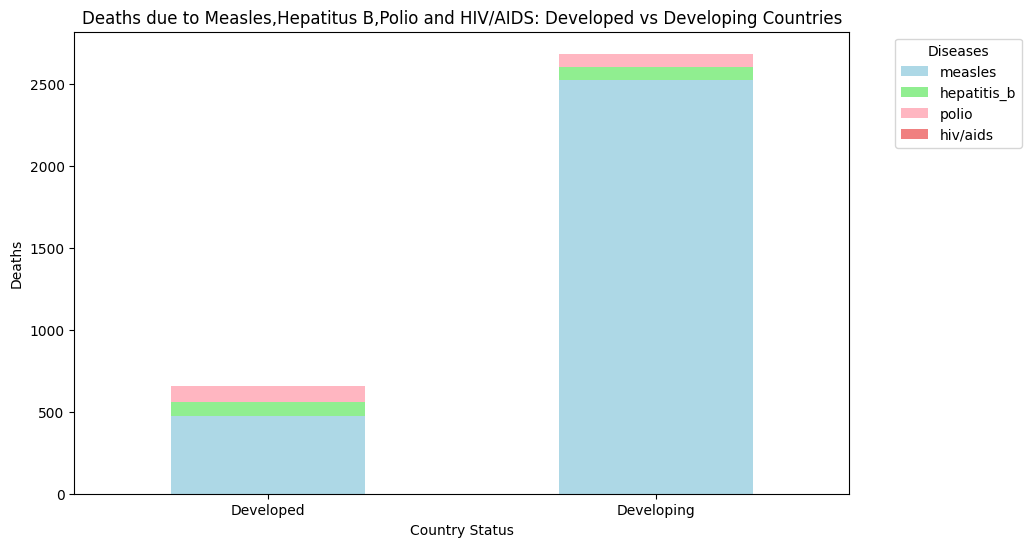

Total deaths due to Measles, Hepatitis B, Polio, and HIV/AIDS in Developed countries: 657
Total deaths due to Measles, Hepatitis B, Polio, and HIV/AIDS in Developing countries: 2687


In [35]:
# Group by Status and calculate mean values for the selected diseases
vaccination_comparison = life_expectancy.groupby("status")[["measles", "hepatitis_b", "polio", "hiv/aids"]].mean()

# Create a stacked bar plot
vaccination_comparison.plot.bar(
    stacked=True, 
    color=["lightblue", "lightgreen", "lightpink", "lightcoral"], 
    figsize=(10, 6), 
    title="Deaths due to Measles,Hepatitus B,Polio and HIV/AIDS: Developed vs Developing Countries"
)

# Add labels and formatting
plt.ylabel("Deaths")
plt.xlabel("Country Status")
plt.xticks(rotation=0)  # Ensure x-axis labels are horizontal
plt.legend(title="Diseases", bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()


# Calculate the total deaths for each status
total_deaths = vaccination_comparison.sum(axis=1)

# Print the total deaths for Developed vs Developing countries
for status, deaths in total_deaths.items():
    print(f"Total deaths due to Measles, Hepatitis B, Polio, and HIV/AIDS in {status} countries: {int(deaths)}")



Comparison of Infant Deaths, Under-Five Deaths, and Thinness (10-19 Years): Developed vs Developing Countries

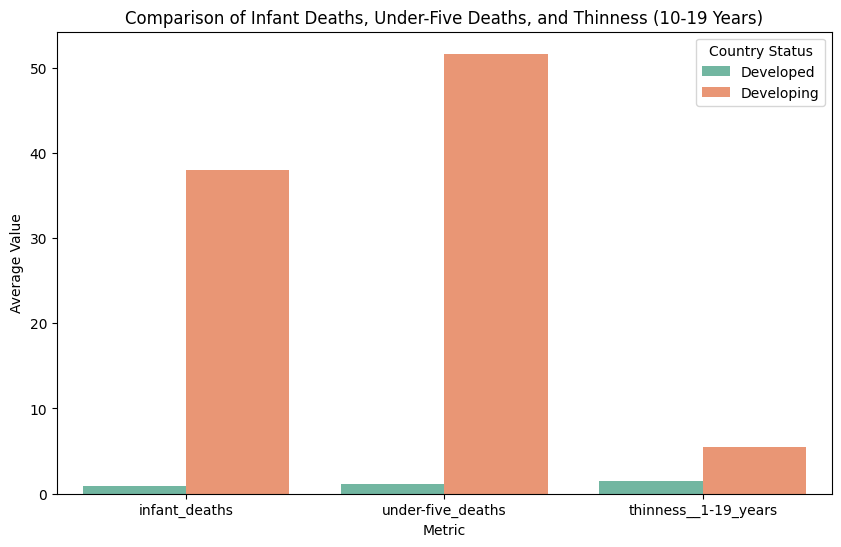

Total numbers for Infant Deaths, Under-Five Deaths, and Thinness (10-19 Years) by Country Status:
  - Total for Developed countries: 3
  - Total for Developing countries: 95


In [36]:
# Group by Status and calculate mean values for selected metrics
comparison = life_expectancy.groupby("status")[["infant_deaths", "under-five_deaths", "thinness__1-19_years"]].mean().reset_index()

# Melt the dataframe for seaborn plotting
comparison_melted = comparison.melt(id_vars="status", var_name="Metric", value_name="Average Value")

# Set the color palette
sns.set_palette("Set2")

# Create the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Metric", y="Average Value", hue="status", data=comparison_melted)

# Add labels and title
plt.title("Comparison of Infant Deaths, Under-Five Deaths, and Thinness (10-19 Years)")
plt.xlabel("Metric")
plt.ylabel("Average Value")
plt.legend(title="Country Status")
plt.show()


# Calculate the total numbers for each metric by country status
status_totals = comparison.set_index("status").sum(axis=1)

# Calculate overall totals for each metric
overall_totals = comparison.sum(numeric_only=True)

# Print total numbers for each status
print("Total numbers for Infant Deaths, Under-Five Deaths, and Thinness (10-19 Years) by Country Status:")
for status, total in status_totals.items():
    print(f"  - Total for {status} countries: {int(total)}")


Life Expectancy by Alcohol Consumption Levels

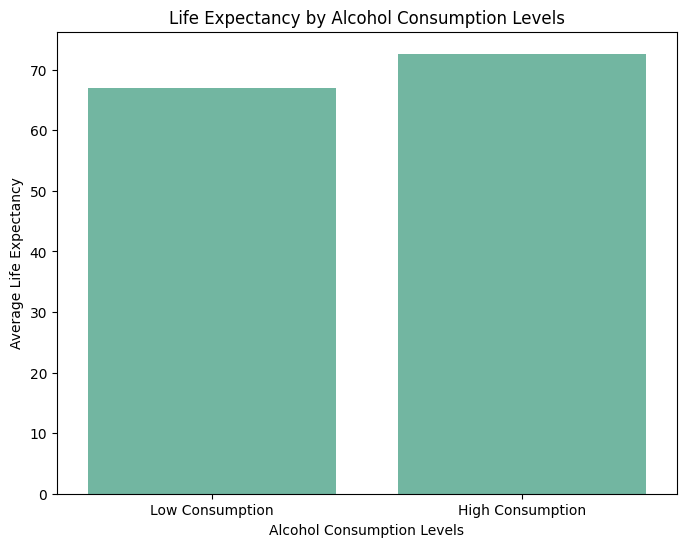

Average Life Expectancy by Alcohol Category:
 Alcohol_Category
High Consumption    72.64
Low Consumption     67.05
Name: life_expectancy, dtype: float64


In [37]:
# Categorize countries based on alcohol consumption levels
def categorize_alcohol(x):
    if x <= 5:
        return "Low Consumption"
    else:
        return "High Consumption"

# Apply categorization
life_expectancy["Alcohol_Category"] = life_expectancy["alcohol"].apply(categorize_alcohol)



# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x="Alcohol_Category", y="life_expectancy", data=life_expectancy, estimator="mean", errorbar=None)

# Add title and labels
plt.title("Life Expectancy by Alcohol Consumption Levels")
plt.xlabel("Alcohol Consumption Levels")
plt.ylabel("Average Life Expectancy")
plt.show()

# Apply categorization
life_expectancy["Alcohol_Category"] = life_expectancy["alcohol"].apply(categorize_alcohol)

# Calculate average life expectancy for each category
average_life_expectancy = life_expectancy.groupby("Alcohol_Category")["life_expectancy"].mean()
print("Average Life Expectancy by Alcohol Category:\n", average_life_expectancy)


Impact of Schooling on Life Expectancy

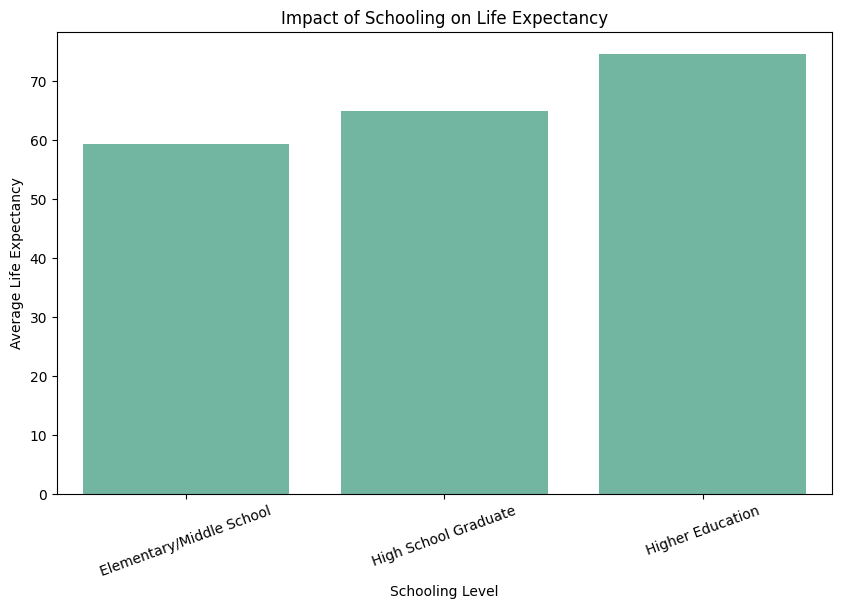

Average Life Expectancy by Schooling Level:
Elementary/Middle School: 59.28 years
High School Graduate: 64.84 years
Higher Education: 74.58 years


In [38]:
# Define the function to categorize schooling levels
def categorize_schooling(x):
    if x < 9:  # Elementary and Middle School
        return "Elementary/Middle School"
    elif 9 <= x <= 12:  # High School Graduate
        return "High School Graduate"
    else:  # Higher Education
        return "Higher Education"

# Apply the categorization to the 'schooling' column
life_expectancy["Schooling_Level"] = life_expectancy["schooling"].apply(categorize_schooling)

# Define an order for the schooling levels (optional, based on visualization needs)
schooling_order = [
    "Elementary/Middle School",
    "High School Graduate",
    "Higher Education"
]

# Plot the results
sns.set_palette("Set2")
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Schooling_Level",
    y="life_expectancy",
    data=life_expectancy,
    estimator="mean",
    order=schooling_order,
    errorbar=None,
)

# Add title and labels
plt.title("Impact of Schooling on Life Expectancy")
plt.xlabel("Schooling Level")
plt.ylabel("Average Life Expectancy")
plt.xticks(rotation=20)  # Rotate x-axis labels for readability
plt.show()

# Calculate average life expectancy for each schooling level
schooling_comparison = life_expectancy.groupby("Schooling_Level")["life_expectancy"].mean()

# Print each schooling level and its average life expectancy
print("Average Life Expectancy by Schooling Level:")
for level, expectancy in schooling_comparison.items():
    print(f"{level}: {expectancy:.2f} years")

## Discussion ##

In this assignment, I analyzed global life expectancy data, focusing on the relationships between education, alcohol consumption, and country status (developed vs. developing). The average life expectancy in developed countries is approximately 20% higher than in developing countries. The analysis revealed that individuals in developed countries consistently have higher life expectancies compared to those in developing countries, likely due to better access to resources such as healthcare and education. Individuals with higher education had a life expectancy 15% greater than those with only elementary or middle school education. Higher levels of education were strongly associated with increased life expectancy, emphasizing the importance of educational opportunities in promoting longevity. Additionally, lifestyle factors such as alcohol consumption showed noticeable trends, with lower alcohol consumption correlating with higher life expectancy. People with low alcohol consumption had a life expectancy 10% higher than those with high consumption. Furthermore, diseases like measles, polio, and HIV/AIDS had a disproportionately greater impact on life expectancy in developing countries, highlighting the critical need for better disease prevention and healthcare infrastructure. These findings underline the importance of global efforts to improve education, promote healthier lifestyles, and strengthen healthcare systems, especially in developing regions, to reduce disparities in life expectancy and enhance global health outcomes.

## References
1. Wikipedia, Life expectancy, https://en.wikipedia.org/wiki/Life_expectancy
2. Wikipedia, Life expectancy picture, https://upload.wikimedia.org/wikipedia/commons/3/3a/Life_expectancy_UN_map_gradient_2023.png
3. Source data, Github -https://raw.githubusercontent.com/AbdulMus/lifeEx/refs/heads/main/Life%20Expectancy%20Data%20(3).csv
4. Pandas for data manipulation
5. Seaborn for data visualization
6. Matplotlib for data visualization

## LLM Prompts

- What factors influence life expectancy worldwide?
- How to do Exploratory Data Analysis on Life Expectancy?